In [106]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
import netCDF4
import numpy as np
import os
from datetime import datetime
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

## In situ locations:

In [2]:
Station_list = ['POLESOUT', 'KISSR0.0', 'LZ2', 'FEBIN', 'MBOXSOU', 'MH24000', 
                'FEBOUT', 'L005', 'L008', 'LZ40', 'L004', 'S308C', 'POLE3S', 
                'RITTAE2', 'L007', 'PELBAY3', 'L006', 'LZ30']

In [3]:
coordinate = pd.read_csv("coordinate.csv")
coordinate["Lat2"] = list(map(lambda lat: int(str(lat)[:2])+ int(str(lat)[2:4])/60 + float(str(lat)[4:])/3600,
                             coordinate["Latitude"]))
coordinate["Lon2"] = list(map(lambda lon: -(int(str(lon)[:2])+ int(str(lon)[2:4])/60 + float(str(lon)[4:])/3600),
                             coordinate["Longtitude"]))
coordinate[["Site Name", "Lat2", "Lon2"]]

,Site Name,Lat2,Lon2
0,POLESOUT,27.038198,-80.918541
1,KISSR0.0,27.141301,-80.846000
2,LZ2,27.189756,-80.828040
3,S133,27.206467,-80.801019
4,S135,27.086633,-80.661156
5,FEBIN,26.959360,-81.069347
6,MBOXSOU,26.921446,-81.059901
7,MH24000,26.877455,-81.018807
8,FEBOUT,26.971805,-81.005937
9,L005,26.956730,-80.972385


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  app.launch_new_instance()


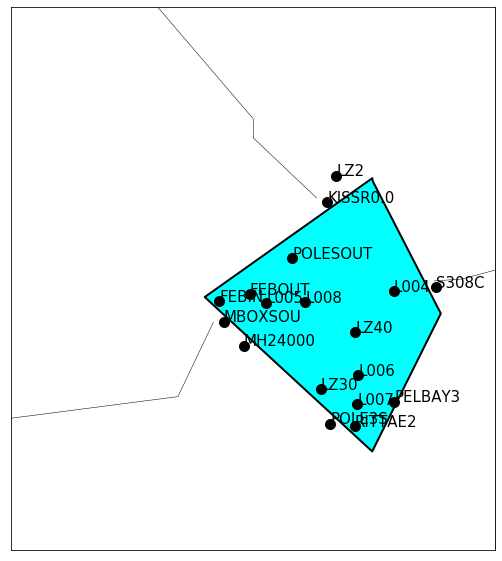

In [4]:
plt.figure(figsize=(10,10))
lat = 27
lon = -81
inclat = 0.5
inclon = 0.5

m = Basemap(projection='merc',
    llcrnrlon = lon - inclon, urcrnrlon = lon + inclon, 
    llcrnrlat = lat - inclat, urcrnrlat = lat + inclat, 
    lat_ts = 0, resolution= 'l',
    suppress_ticks = True)

m.drawcountries(linewidth = 1)
m.drawstates(linewidth = 0.2)
m.drawcoastlines(linewidth=2)
m.drawrivers()
m.fillcontinents(color='white',lake_color='aqua')
m.shadedrelief()
#(LON, LAT)
for station in Station_list:
    [[lat, lon]] = np.array(coordinate.loc[coordinate["Site Name"]==station, ["Lat2","Lon2"]])
    x, y = m(lon, lat)
    plt.plot(x, y, 'ok', markersize=10)
    plt.text(x, y, station, fontsize=15)
plt.show()

In [5]:
def find_closest(array, value):
    min_difference = 9999
    closest_value = None
    for item in array:
        if abs(item-value) < min_difference:
            min_difference = abs(item-value)
            closest_value = item
    return closest_value

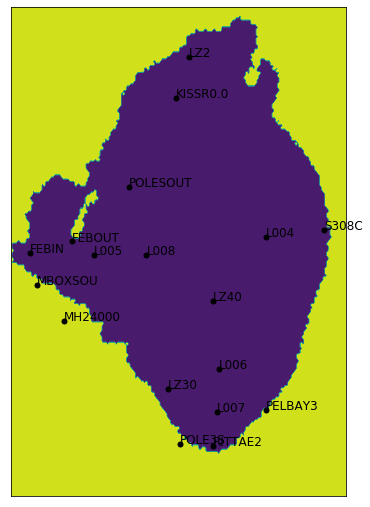

In [208]:
path = r"Remote_sensing/S3_LO/S3B_OL_1_EFR____20190205T153448_20190205T153748_20190206T193112_0179_021_339_2520_LN1_O_NT_002.l2.nc"
data = netCDF4.Dataset(path)
plt.figure(figsize=(6,9))
plt.contourf(data.variables["LAND"][:])
plt.xticks([])
plt.yticks([])

lon_array = np.array(data.variables["lon"])[0]
lat_array = np.sort([x[0] for x in np.array(data.variables["lat"])])

for station in Station_list:
    [[lat, lon]] = np.array(coordinate.loc[coordinate["Site Name"]==station, ["Lat2","Lon2"]])
    closest_lon = find_closest(lon_array, lon)
    closest_lat = find_closest(lat_array, lat)
    x, y = list(lon_array).index(closest_lon), list(lat_array).index(closest_lat)
    closest_lon = find_closest(lon_array, lon)
    closest_lat = find_closest(lat_array, lat)
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x, y, station, fontsize=12)

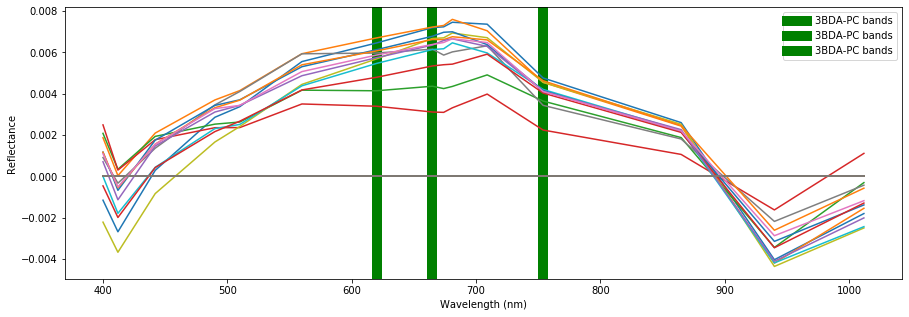

In [215]:
plt.figure(figsize=(15,5))

for x in [620, 665, 754]:
    plt.axvline(x=x, color="green", label="3BDA-PC bands", linewidth=10)
wavelength_array = [400, 412, 442, 490, 510, 560, 620, 665, 665, 674, 681, 709, 754, 865, 940, 1012]

for station in Station_list:
    [[lat, lon]] = np.array(coordinate.loc[coordinate["Site Name"]==station, ["Lat2","Lon2"]])
    closest_lon = find_closest(lon_array, lon)
    closest_lat = find_closest(lat_array, lat)
    x, y = list(lon_array).index(closest_lon), list(lat_array).index(closest_lat)
    Rrs_array = []
    for wavelength in wavelength_array:
        Rrs_array.append(np.array(data.variables[f'Rrs_{wavelength}'])[y,x])
    plt.plot(wavelength_array, Rrs_array)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance")
plt.legend()
plt.show()

## Example of signals from different wavelengths:

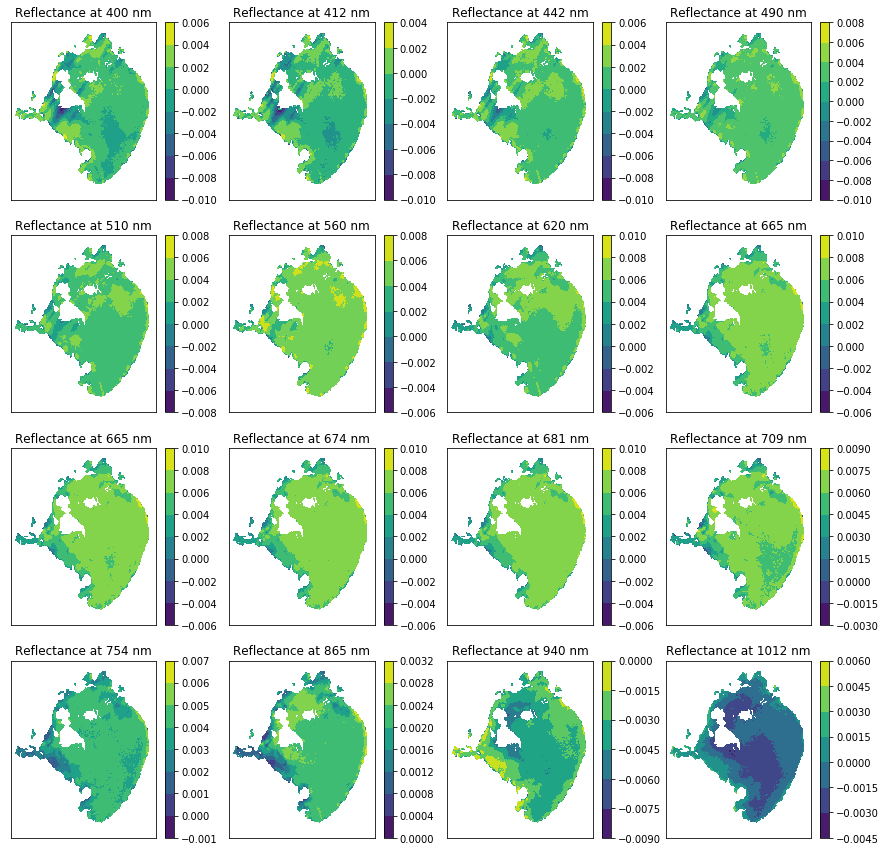

In [225]:
path = r"Remote_sensing/S3_LO/S3B_OL_1_EFR____20190205T153448_20190205T153748_20190206T193112_0179_021_339_2520_LN1_O_NT_002.l2.nc"
data = netCDF4.Dataset(path)
land_mask = np.where(land_array==1, np.nan, land_array)
cloud_mask = np.where(cloud_array==1, np.nan, cloud_array)

fig = plt.figure(figsize=(15,15))
i = 0
for wavelength in [400, 412, 442, 490, 510, 560, 620, 665, 665, 674, 681, 709, 754, 865, 940, 1012]:
    i += 1
    ax = fig.add_subplot(4, 4, i)
    sub_data = np.array(data.variables[f'Rrs_{wavelength}']) + land_mask + cloud_mask
    cs = ax.contourf(sub_data)
    fig.colorbar(cs, ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"Reflectance at {wavelength} nm")

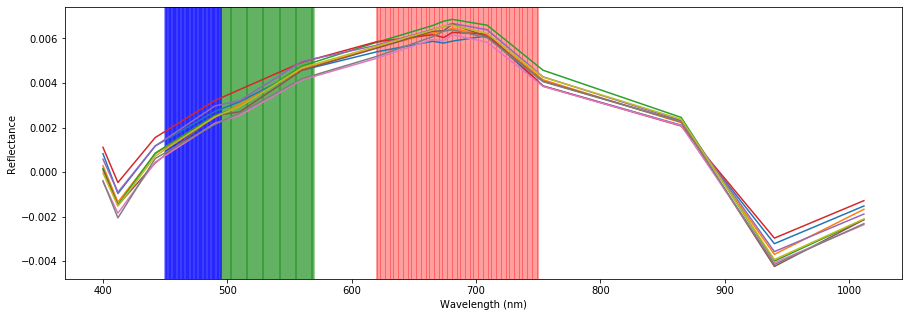

In [129]:
plt.figure(figsize=(15,5))
green1 = 495
green2 = 570
for greenx in np.linspace(green1, green2, 100):
    plt.axvline(x=greenx, alpha = 0.5, color="green")
    
blue1 = 450
blue2 = 495
for bluex in np.linspace(blue1, blue2, 100):
    plt.axvline(x=bluex, alpha = 0.5, color="blue")

for redx in np.linspace(620, 750, 100):
    plt.axvline(x=redx, alpha = 0.5, color="red")
    
wavelength_array = [400, 412, 442, 490, 510, 560, 620, 665, 665, 674, 681, 709, 754, 865, 940, 1012]

for x in [100,110,120]:
    for y in [70,80,90]:
        Rrs_array = []
        for wavelength in wavelength_array:
            Rrs_array.append(np.array(data.variables[f'Rrs_{wavelength}'])[y,x])
    
        plt.plot(wavelength_array, Rrs_array)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance")
plt.show()

## Cyanobacteria Index:

Link: https://docs.google.com/document/d/1u2b-dAuU3gP8kAXs7cQR7lHpC_tT9iweENjhLhS8TMA/edit

In [171]:
def CI_estimate(data, method):
    """
    Methods include: 
    "2BDA-PC", "3BDA-PC", "NDPCI", "2BDA-CL", "3BDA-CL", "NDCI", "Wynne"
    """
    if method == "2BDA-PC":
        Rrs709 = np.array(data.variables['Rrs_709'])
        Rrs620 = np.array(data.variables['Rrs_620'])
        return Rrs709/Rrs620
    
    if method == "3BDA-PC":
        Rrs620 = np.array(data.variables['Rrs_620'])
        Rrs665 = np.array(data.variables['Rrs_665'])
        Rrs754 = np.array(data.variables['Rrs_754'])
        return (1/Rrs620 - 1/Rrs665)*Rrs754
    
    if method == "NDPCI":
        Rrs709 = np.array(data.variables['Rrs_709'])
        Rrs620 = np.array(data.variables['Rrs_620'])
        return (Rrs709-Rrs620)/(Rrs709+Rrs620)
    
    if method == "2BDA-CL":
        Rrs709 = np.array(data.variables['Rrs_709'])
        Rrs665 = np.array(data.variables['Rrs_665'])
        return Rrs709/Rrs665
    
    if method == "3BDA-CL":
        Rrs665 = np.array(data.variables['Rrs_665'])
        Rrs709 = np.array(data.variables['Rrs_709'])
        Rrs754 = np.array(data.variables['Rrs_754'])
        return (1/Rrs665 - 1/Rrs709)*Rrs754
    
    if method == "NDCI":
        Rrs665 = np.array(data.variables['Rrs_665'])
        Rrs709 = np.array(data.variables['Rrs_709'])
        return (Rrs709-Rrs665)/(Rrs709+Rrs665)
    
    if method == "Wynne":
        Rrs681 = np.array(data.variables['Rrs_681'])
        Rrs665 = np.array(data.variables['Rrs_665'])
        Rrs709 = np.array(data.variables['Rrs_709'])
        land_array = np.array(data.variables["LAND"])
        cloud_array = np.array(data.variables["CLOUD"])
        land_mask = np.where(land_array==1, np.nan, land_array)
        cloud_mask = np.where(cloud_array==1, np.nan, cloud_array)
        return -(Rrs681-Rrs665-(Rrs709-Rrs665)*((681-665)/(709-665))) + land_mask + cloud_mask

In [217]:
methods = ["2BDA-PC", "3BDA-PC", "NDPCI", "2BDA-CL", "3BDA-CL", "NDCI", "Wynne"]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in subtract
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in subtract
/opt/anacond

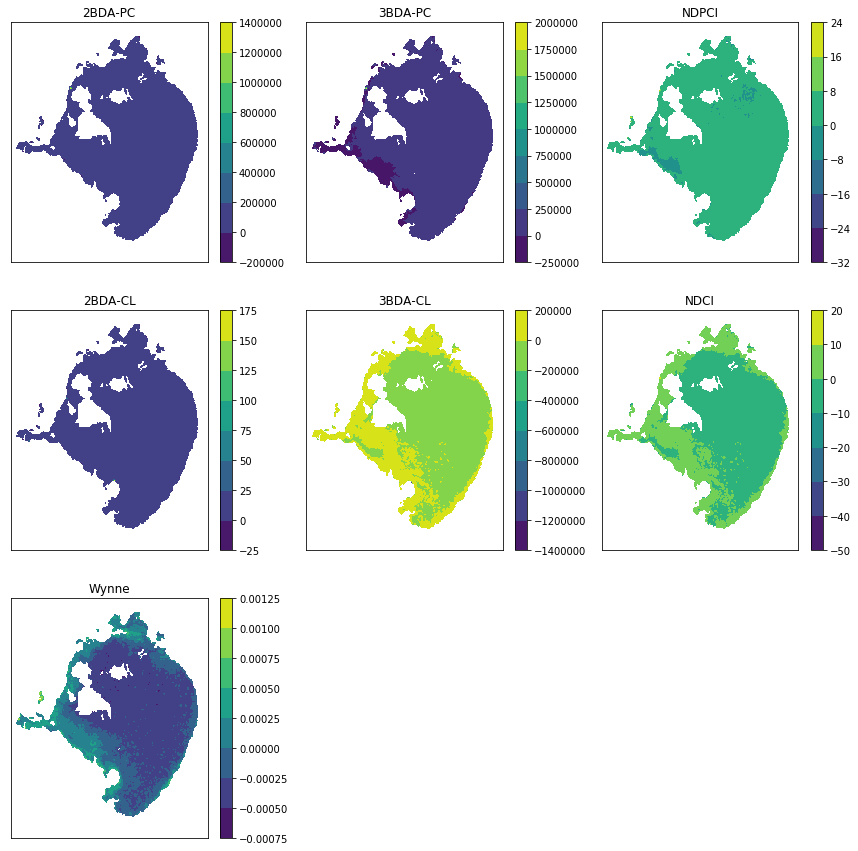

In [223]:
fig = plt.figure(figsize=(15,15))
i = 0
for method in ["2BDA-PC", "3BDA-PC", "NDPCI", "2BDA-CL", "3BDA-CL", "NDCI", "Wynne"]:
    CI_data = CI_estimate(data, method=method)
    i += 1
    ax = fig.add_subplot(3, 3, i)
    ax.contourf(CI_data)
    cs = ax.contourf(CI_data)
    fig.colorbar(cs, ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(method)

## Full procedure:

In [119]:
def full_procedure(file):
    global coordiate, Station_list
    path = f"Remote_sensing/S3_LO/{file}"
    data = netCDF4.Dataset(path)
    lon_array = np.array(data.variables["lon"])[0]
    lat_array = np.sort([x[0] for x in np.array(data.variables["lat"])])
    
    methods = ["2BDA-PC", "3BDA-PC", "NDPCI", "2BDA-CL", "3BDA-CL", "NDCI", "Wynne"]
    result = {method:{} for method in methods}
    #Transfer wavelength to cyanobacteria index:
    for method in methods:
        CI_data = CI_estimate(data, method)
        for station in Station_list:
            [[lat, lon]] = np.array(coordinate.loc[coordinate["Site Name"]==station, ["Lat2","Lon2"]])
            closest_lon = find_closest(lon_array, lon)
            closest_lat = find_closest(lat_array, lat)
            x, y = list(lon_array).index(closest_lon), list(lat_array).index(closest_lat)
            result[method][station] = np.array(CI_data)[y,x]
    return result

In [193]:
RS_result = dict()
for filename in os.listdir(f'Remote_sensing/S3_LO/'):
    if filename != ".ipynb_checkpoints" and filename[:3] =="S3B":
        date = filename[16:24]
        hour = filename[25:31]
        RS_result[date] = full_procedure(filename)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in subtract
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in subtract
/opt/anacond

In [33]:
insitu_data = pd.read_csv("In_Situ/In_Situ_ChlA.csv")
insitu_data = insitu_data[["Date", "Station", "In Situ ChlA"]]
insitu_data["Date"] = list(map(lambda date: datetime.strptime(date, '%Y-%m-%d'),
                               insitu_data["Date"]))
insitu_data

,Date,Station,In Situ ChlA
0,2010-10-20,POLESOUT,6.550
1,2010-12-15,POLESOUT,7.700
2,2011-01-04,POLESOUT,20.250
3,2011-02-14,POLESOUT,13.800
4,2011-03-08,POLESOUT,15.700
...,...,...,...
2176,2020-04-08,LZ30,7.130
2177,2020-05-06,LZ30,30.500
2178,2020-05-06,LZ30,0.016
2179,2020-05-21,LZ30,11.500


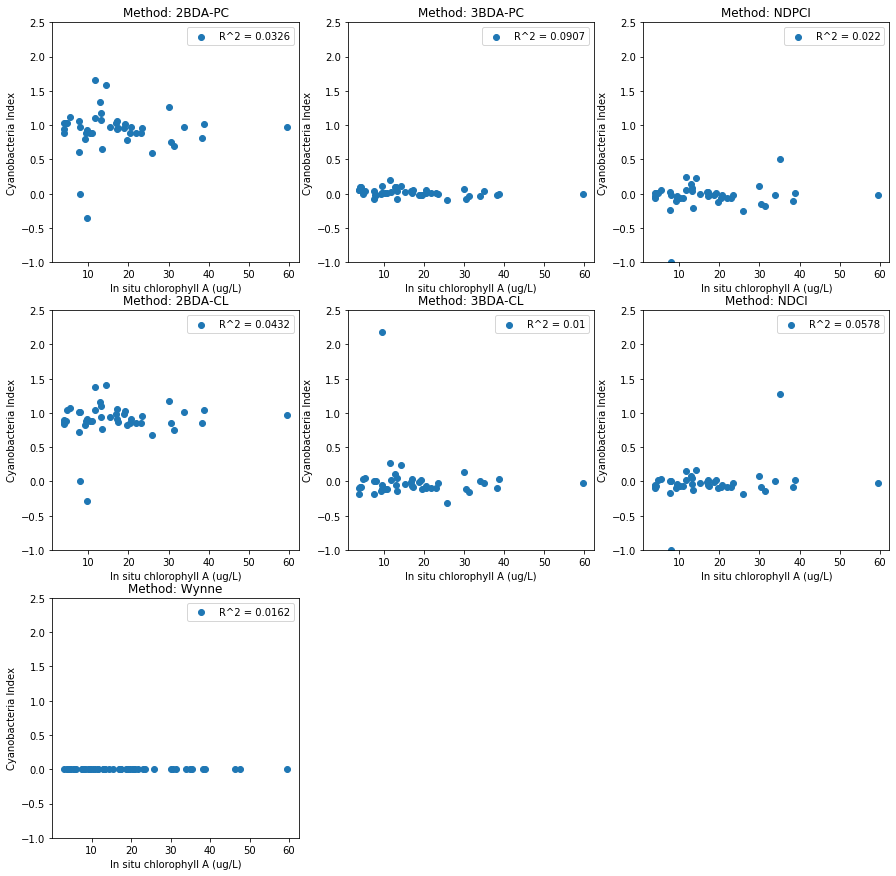

In [207]:
fig = plt.figure(figsize=(15,15))
i = 0
for method in ["2BDA-PC", "3BDA-PC", "NDPCI", "2BDA-CL", "3BDA-CL", "NDCI", "Wynne"]:
    i += 1
    date_array = []
    station_array =[]
    CI_array = []

    for date in RS_result.keys():
        for station in Station_list:
            date_array.append(date)
            station_array.append(station)
            CI_array.append(RS_result[date][method][station])

    RS_data = pd.DataFrame({"Date": date_array,
                            "Station": station_array,
                            "CI": CI_array})
    RS_data["Date"] = list(map(lambda date: datetime.strptime(date, '%Y%m%d'),
                                RS_data["Date"]))
    merged_data = pd.merge(insitu_data, RS_data, on=["Date", "Station"], how='left')
    merged_data = merged_data.replace([np.inf, -np.inf], np.nan).dropna()
    
    x = merged_data["In Situ ChlA"]
    y = merged_data["CI"]
    #ln = linregress(x,y)
    correlation_matrix = np.corrcoef(x, y)
    correlation_xy = correlation_matrix[0,1]
    r_squared = correlation_xy**2
    ax = fig.add_subplot(3,3,i)
    ax.scatter(x, y, label=f"R^2 = {round(r_squared,4)}")
    ax.set_xlabel("In situ chlorophyll A (ug/L)")
    ax.set_ylabel("Cyanobacteria Index")
    ax.set_title(f"Method: {method}")
    ax.set_ylim((-1,2.5))
    ax.legend()

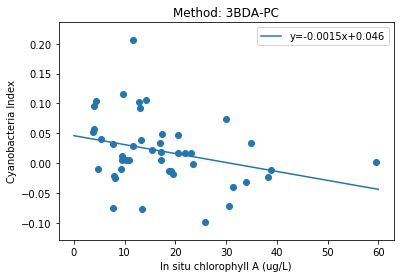

In [206]:
method = "3BDA-PC"
date_array = []
station_array =[]
CI_array = []

for date in RS_result.keys():
    for station in Station_list:
        date_array.append(date)
        station_array.append(station)
        CI_array.append(RS_result[date][method][station])

RS_data = pd.DataFrame({"Date": date_array,
                        "Station": station_array,
                        "CI": CI_array})
RS_data["Date"] = list(map(lambda date: datetime.strptime(date, '%Y%m%d'),
                            RS_data["Date"]))
merged_data = pd.merge(insitu_data, RS_data, on=["Date", "Station"], how='left')
merged_data = merged_data.replace([np.inf, -np.inf], np.nan).dropna()

x = merged_data["In Situ ChlA"]
y = merged_data["CI"]
x_pred = np.linspace(0,60,100)
y_pred = ln.slope*x_pred + ln.intercept
ln = linregress(x,y)
R = pearsonr(x,y)[0]
plt.scatter(x, y)
plt.plot(x_pred, y_pred, label=f"y={round(ln.slope,4)}x+{round(ln.intercept,4)}")
plt.xlabel("In situ chlorophyll A (ug/L)")
plt.ylabel("Cyanobacteria Index")
plt.title(f"Method: {method}")
plt.legend()
plt.show()

In [183]:
RS_result_2 = dict()
for filename in os.listdir(f'Remote_sensing/S3_LO/'):
    if filename != ".ipynb_checkpoints" and filename[:3] =="S3B":
        date = filename[16:24]
        hour = filename[25:31]
        RS_result_2[date] = full_procedure(filename)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in subtract
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in subtract
/opt/anacond

In [ ]:
for method in ["2BDA-PC", "3BDA-PC", "NDPCI", "2BDA-CL", "3BDA-CL", "NDCI", "Wynne"]:
    date_array = []
    station_array =[]
    CI_array = []

    for date in RS_result_2.keys():
        for station in Station_list:
            date_array.append(date)
            station_array.append(station)
            CI_array.append(RS_result_2[date][method][station])

    RS_data = pd.DataFrame({"Date": date_array,
                            "Station": station_array,
                            "CI": CI_array})
    RS_data["Date"] = list(map(lambda date: datetime.strptime(date, '%Y%m%d'),
                                RS_data["Date"]))
    merged_data = pd.merge(insitu_data, RS_data, on=["Date", "Station"], how='left')
    merged_data = merged_data.replace([np.inf, -np.inf], np.nan).dropna()
    
    x = merged_data["In Situ ChlA"]
    y = merged_data["CI"]
    #ln = linregress(x,y)
    R = pearsonr(x,y)[0]
    plt.scatter(x, y, label=f"Pearson R = {round(R,4)}")
    plt.xlabel("In situ chlorophyll A (ug/L)")
    plt.ylabel("Cyanobacteria Index")
    plt.title(f"Method: {method}")
    plt.ylim((-1,2.5))
    plt.legend()
    plt.show()